# 1 Feedforward: Building a ReLU neural net-work

3. Write out the forward-pass function in python, call it ``ff_nn_ReLu(...)``

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct

In [2]:
def ff_nn_Relu(W, X, b, V, c):
    XW = np.dot(X,W) + b
    XW[XW <= 0] = 0
    output  = np.dot(XW, V) + c
    y = 1. / (1 + np.exp(-output))
    return y

4. Class probabilities associated with the forward pass of each sample with given weights and input.

In [3]:
W = np.array([[1, -1, 0],
             [0, 0, .5]])
b = np.array([0, 0, 1])
X = np.array([[1, -1], [0, -1], [0, 1]])
V = np.array([[1], [0], [-1]])
c = np.array([1])

In [4]:
ff_nn_Relu(W, X, b, V, c)

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

# 2 Gradient Descent

$f(x, y) = (1 - x^3) + 100 \times (y^2 - x)^2$

2. Create a visualization of the contours of this function.

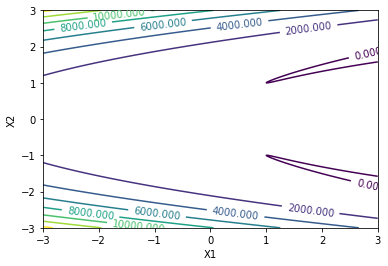

In [5]:
f = lambda x1, x2: (1-x1**3) + 100*(x2**2 - x1)**2
x1 = np.linspace(-3.0, 3.0, 500)
x2 = np.linspace(-3.0, 3.0, 500)

x = np.vstack([x1, x2]).T
y = f(x1, x2)

X1, X2 = np.meshgrid(x1, x2)
Y = f(X1, X2)
cp = plt.contour(X1, X2, Y)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [6]:
def grad_f2(X):
    result = []
    x = X[0]
    y = X[1]
    df_dx = -3*x**2 - 200*(y**2 - x)
    df_dy = 400*y*(y**2 - x)
    result.append(df_dx)
    result.append(df_dx)
    return np.array(result)

In [7]:
def grad_descent(x_0 = np.array([1,1]), alpha = 0.001, iteration = 50):
    x = x_0
    trajectory = [x]
    for i in range(iteration): 
        gradient = grad_f2(x)
        new_x = x - alpha * gradient 
        new_y = f(new_x[0], new_x[1])    
        trajectory.append(new_x)
        x = new_x

    return x, trajectory          

In [8]:
_, trajectory1 = grad_descent(x_0 = np.array([1,1]), alpha = 0.001, iteration = 20)
_, trajectory2 = grad_descent(x_0 = np.array([1,1]), alpha = 0.0001, iteration = 20)
_, trajectory3 = grad_descent(x_0 = np.array([1,1]), alpha = 0.0002, iteration = 20)
_, trajectory4 = grad_descent(x_0 = np.array([1,1]), alpha = 0.0005, iteration = 20)

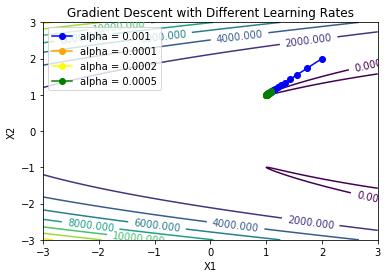

In [9]:
cp = plt.contour(X1, X2, Y)
plt.plot([x for (x,y) in trajectory1], [y for (x,y) in trajectory1],
         '-o', color='blue', label='alpha = 0.001')
plt.plot([x for (x,y) in trajectory2], [y for (x,y) in trajectory2],
         '-o', color='orange', label='alpha = 0.0001')
plt.plot([x for (x,y) in trajectory3], [y for (x,y) in trajectory3],
         '-o', color='yellow', label='alpha = 0.0002')
plt.plot([x for (x,y) in trajectory4], [y for (x,y) in trajectory4],
         '-o', color='green', label='alpha = 0.0005')
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Gradient Descent with Different Learning Rates')
plt.show()

4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm's hyperparameters.

In [10]:
def grad_descent_momentum(x_0 = np.array([1,1]), alpha = 0.001, iteration = 20, beta=0.9):
    x = x_0
    trajectory = [x]
    v = np.zeros(x.size)
    for i in range(iteration): 
        v = beta*v + (1-beta)*grad_f2(x)
        vc = v/(1+beta**(i+1))
        new_x = x - alpha * vc
        new_y = f(new_x[0], new_x[1])    
        trajectory.append(new_x)
        x = new_x
    return x, trajectory

In [11]:
_, trajectory5 = grad_descent_momentum(x_0 = np.array([4,1]), alpha = 0.01, iteration = 5, beta=0.9)
_, trajectory6 = grad_descent_momentum(x_0 = np.array([4,1]), alpha = 0.01, iteration = 5, beta=0.8)
_, trajectory7 = grad_descent_momentum(x_0 = np.array([4,1]), alpha = 0.05, iteration = 5, beta=0.9)
_, trajectory8 = grad_descent_momentum(x_0 = np.array([4,1]), alpha = 0.001, iteration = 5, beta=0.9)

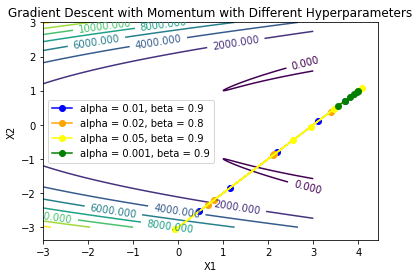

In [12]:
cp = plt.contour(X1, X2, Y)
plt.plot([x for (x,y) in trajectory5], [y for (x,y) in trajectory5],
         '-o', color='blue', label='alpha = 0.01, beta = 0.9')
plt.plot([x for (x,y) in trajectory6], [y for (x,y) in trajectory6],
         '-o', color='orange', label='alpha = 0.02, beta = 0.8')
plt.plot([x for (x,y) in trajectory7], [y for (x,y) in trajectory7],
         '-o', color='yellow', label='alpha = 0.05, beta = 0.9')
plt.plot([x for (x,y) in trajectory8], [y for (x,y) in trajectory8],
         '-o', color='green', label='alpha = 0.001, beta = 0.9')
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'center left')
plt.title('Gradient Descent with Momentum with Different Hyperparameters')
plt.show()

# 3 Backprop

2. Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [13]:
def relu(x, derivative=False):
    r = np.where(x > 0, x, 0)
    if derivative == True:
        return np.where(x > 0, 1, 0)
    return r

def sigmoid(x, derivative=False):
    s = 1.0 / (1.0 + np.exp(-x))
    if derivative == True:
        return s * (1.0 - s)
    return s

def loss_function(y, y_hat):
    loss = y * np.log(y_hat)+(1 - y) * np.log(1 - y_hat)
    return -sum(loss)

def grad_f(X, Y, W, V, b, c):
    y = Y
    in_put = np.array(np.dot(X, W) + b)
    h = relu(in_put)
    y_hat = sigmoid(np.dot(h, V) + c)
    dLdc = (y_hat-y).sum()
    dLdV = np.dot(h.T, y_hat - y)
    dLdb = (np.dot(y_hat - y, V.T) * relu(in_put, derivative = True)).sum(axis=0)
    dLdW = np.dot(X.T, np.dot(y_hat-y, V.T)*relu(in_put, derivative = True))   
    
    return (dLdW, dLdV, dLdb, dLdc)

In [14]:
W = np.random.randn(6).reshape(2,3)
V = np.random.randn(3).reshape(3,1)
b = np.random.randn(3).reshape(1,3)
c = np.random.randn(1)

X = np.random.randn(1000).reshape((500,2))
Y = np.random.randn(500).reshape((500,1))

grad_f(X, Y, W, V, b, c)

(array([[-39.81503637, -38.06683273,  -2.0849711 ],
        [  9.29463809,  -3.77258282,  -2.4230874 ]]), array([[27.92452391],
        [16.08882161],
        [-8.30015941]]), array([-19.03408928, -21.75220223,   3.03985228]), 20.114878298591655)

3. Generate a synthetic dataset like the XOR pattern (see below).

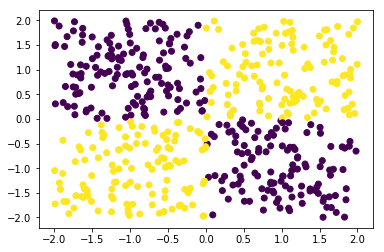

In [15]:
x_xor = np.random.uniform(low = -2,high = 2, size=1000).reshape((500,2))
y_xor = np.zeros((500,1))

y_xor[np.logical_and(x_xor[:,0] > 0, x_xor[:,1] > 0)] = 1
y_xor[np.logical_and(x_xor[:,0] < 0, x_xor[:,1] < 0)] = 1

plt.scatter(x_xor[:,0], x_xor[:,1], c = y_xor[:,0])
plt.show()

4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [16]:
x = x_xor
y = y_xor
W = np.array([[1, -1, 0],
             [0, 0, .5]])
b = np.array([0, 0, 1])
V = np.array([[1], [0], [-1]])
c = np.array([1])

loss = []

alpha = 0.001
    
for i in range(100):
    gradient = grad_f(x, y, W, V, b, c)
    
    dLdW, dLdV, dLdb, dLdc = gradient
    
    W = W - alpha * dLdW
    b = b - alpha * dLdb
    V = V - alpha * dLdV
    c = c - alpha * dLdc
    xw = np.dot(x, W) + b
    xw[xw < 0] = 0
    output  = np.dot(xw, V) + c
    y_hat = 1. / (1 + np.exp(-output))
    
    loss.append(- sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

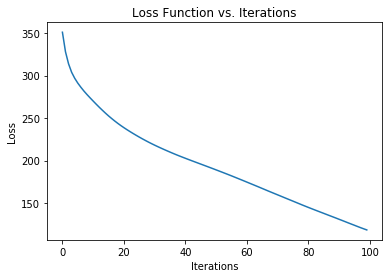

In [17]:
plt.plot(range(0,100), loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function vs. Iterations')
plt.show()

5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [18]:
x = x_xor
y = y_xor
W = np.array([[1, -1, 0],
             [0, 0, .5]])
b = np.array([0, 0, 1])
V = np.array([[1], [0], [-1]])
c = np.array([1])
vs = np.zeros(x.size)
params = (W, V, b, c)

trajectory = []
loss = []

alpha = 0.0001
epsilon = 0.0001

for i in range(1000):    
    gradients = grad_f(x, y, W, V, b, c)
    new_params = []  
    for (i, m, v) in zip(params, gradients, vs):
        new_params.append(i - epsilon * m - alpha * v)
        
    vs = gradients
    params = tuple(new_params)
    
    W, V, b, c = params
    
    h = relu(np.dot(x, W) + b)
    y_hat = sigmoid(np.dot(h, V) + c)
    
    trajectory.append(params)
    loss.append(- sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

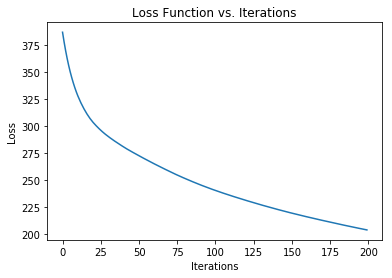

In [19]:
plt.plot(range(0,200), loss[0:200])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function vs. Iterations')
plt.show()

With momentum, the loss function drops more quickly than the previous one.

6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

In [20]:
def get_y_hat(x, params):
    W, V, b, c = params
    h = relu(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, V) + c)
    return y

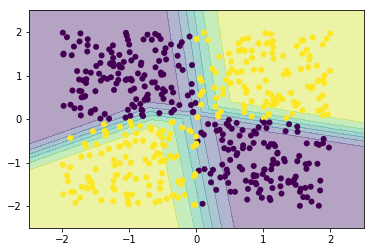

In [21]:
x_span = np.linspace(-2.5, 2.5, 1000)
y_span = np.linspace(-2.5, 2.5, 1000)
xx, yy = np.meshgrid(x_span, y_span)
values = get_y_hat(np.c_[xx.ravel(), yy.ravel()], trajectory[-1])
z = values.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.4)
ax.scatter(x[:,0],x[:,1], c=y[:,0], lw=0)
plt.show()